# **STINTSY Machine Learning Project: Pumpkin Seeds Dataset**

**STINTSY S11 - Milky Way** \
*Group Members:*
- Gutierrez, Mark Daniel
- Refuerzo, Lloyd Dominic
- Romblon, Kathleen Mae
- Stinson, Audrey Lauren

## **1** | **Introduction**

The pumpkin plant belongs to the Cucurbitaceae family and has seasonal varieties. Confectionery pumpkins, grown in Turkey, are usually produced from the pumpkin species, Cucurbita pepo L and sometimes from the Cucurbita moschata Duchesne type. Pumpkin seeds are considered as important for human health because it contains 37 percent of carbohydrate, 35 percent to 40 percent of fat and protein along with calcium, potassium, phosphorus, magnesium, iron, and zinc. Pumpkins are divided into many types, and one of these species is known as “Urgup Sivrisi”. Urgup Sivrisi is a type of pumpkin seed that has a long, white, very bright, thin, and hardly distinguishable shell with a pointed tip. The other type of pumpkin seeds is “Cercevelik”. It is a particular species grown in Turkey, Nevsehir, Karacaoren, and known as “Topak” in Turkey. <span style="color:#42adf5">(*taken directly from* Details *section of the Pumpkin Seeds Dataset pdf*)</span>

The target task for this dataset is to correctly classify whether an image of a pumpkin seed is of the species type "Urgup Sivrisi" or "Cercevelik". The dataset then offers a <span style="color:#f5b942">classification problem</span> that the group will address through the use of various machine learning models, namely **k-Nearest Neighbors**, **Decision Trees**, and **Convolutional Neural Networks (CNNs) / Logistic Regression**. <span style="color:red">(note/to delete/todo: pick between logreg and cnns)</span>

## **2** | **About the Dataset**

The dataset, collected by Koklu et al. (2021), contains extracted features from 2500 images of two varieties of pumpkin seeds, Urgup Sivrisi and Cercevelik. These images were taken inside a product shooting box to prevent shadows from showing if light from outside of the box were to get in. To process the original RGB images, they were converted to gray-toned images, and then to binary images to simplify the value of each pixel in the image. As the RGB images will be converted to binary images for the image processing part, the shadows can make the acquired size and shape of the seed appear smaller.

From the image binarization of each of the 2500 images, 12 features were extracted for each instance. The extracted features are based on the shape of the pumpkin seeds, where each pixel in the image was calculated while considering the values of other nearby pixels.

As such, the extracted features are as follows:

1. <span style="color:#f5b942">Area:</span> Number of pixels within the borders of a pumpkin seed
2. <span style="color:#f5b942">Perimeter:</span> Circumference in pixels of a pumpkin seed
3. <span style="color:#f5b942">Major Axis Length:</span> Large axis distance of a pumpkin seed
4. <span style="color:#f5b942">Minor Axis Length:</span> Small axis distance of a pumpkin seed
5. <span style="color:#f5b942">Convex Area:</span> Number of pixels of the smallest convex shell at the region formed by the pumpkin seed
6. <span style="color:#f5b942">Equiv Diameter:</span> Computed as $\sqrt{4a/\pi}$, where *a* is the area of the pumpkin seed
7. <span style="color:#f5b942">Eccentricity:</span> Eccentricity of a pumpkin seed
8. <span style="color:#f5b942">Solidity:</span> Convex condition of the pumpkin seeds
9. <span style="color:#f5b942">Extent:</span> Ratio of a pumpkin seed area to the bounding box pixels
10. <span style="color:#f5b942">Roundness:</span> Ovality of pumpkin seeds without considering the distortion of the edges
11. <span style="color:#f5b942">Aspect Ration:</span> Aspect ratio of the pumpkin seeds
12. <span style="color:#f5b942">Compactness:</span> Proportion of the area of the pumpkin seed relative to the area of the circle with the same circumference

## **3** | **List of Requirements**

The following cell imports the libraries needed to run the notebook:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

## **4** | **Data Preprocessing**

### *Importing the dataset*

For the following cell, we will be using the `read_csv` function to import the pumpkin seeds dataset to our notebook.

In [2]:
data = pd.read_csv('pumpkin_seeds.csv')

To check that we have imported the data, we can take a look at the first and last 10 instances in the dataset.

In [3]:
data.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
5,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Çerçevelik
6,73338,1020.055,392.2516,238.5494,73859,305.5762,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790,Çerçevelik
7,69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,Çerçevelik
8,95727,1231.609,488.1199,251.3086,96831,349.1180,0.8573,0.9886,0.6188,0.7930,1.9423,0.7152,Çerçevelik
9,73465,1047.767,413.6504,227.2644,74089,305.8407,0.8356,0.9916,0.7443,0.8409,1.8201,0.7394,Çerçevelik


In [4]:
data.tail(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
2490,51555,934.911,401.8321,164.7038,52013,256.2067,0.9121,0.9912,0.7187,0.7412,2.4397,0.6376,Ürgüp Sivrisi
2491,69836,1010.605,396.6286,224.7918,70419,298.1911,0.8239,0.9917,0.6693,0.8593,1.7644,0.7518,Ürgüp Sivrisi
2492,84236,1274.656,456.9323,237.1540,85248,327.4944,0.8548,0.9881,0.6104,0.6515,1.9267,0.7167,Ürgüp Sivrisi
2493,58987,977.410,404.0779,186.3710,59518,274.0522,0.8873,0.9911,0.7327,0.7759,2.1681,0.6782,Ürgüp Sivrisi
2494,79755,1146.431,470.3888,217.8296,80649,318.6647,0.8863,0.9889,0.7175,0.7626,2.1594,0.6774,Ürgüp Sivrisi
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
2499,84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


In [5]:
# (no. of instances, no. of columns [features + target label])
data.shape

(2500, 13)

The dataset consists of 13 columns, where the first 12 columns are the input features and the last column is the target label. There are 2500 instances in total, and the shape of the dataset is `(2500, 13)`.

Optionally, we can see the statistical summary of the dataset by calling the `describe()` function.

In [6]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


### *Data Cleaning*

As we can see, one of the features, `Aspect_Ration`, is spelled incorrectly. To fix this, we will rename that column to `Aspect_Ratio`.

In [7]:
#renaming and reformatting the features
data.columns = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter',
                'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ratio', 'Compactness', 'Class']

The class labels can be renamed so that it only includes letters from the English alphabet, and this will be done by running the following cell block.

In [8]:
data['Class'] = data['Class'].str.strip().str.title().replace({'Çerçevelik': 'Cercevelik'})
data['Class'] = data['Class'].str.strip().str.title().replace({'Ürgüp Sivrisi': 'Urgup Sivrisi'})
#data.info()
#data.hist(figsize=(12,12))
#plt.show()

In continuation, we can check if there are other representations of the Class column by calling the `unique()` function on it. Since there are only two unique values, we do not need to make any changes for this column for now.

In [9]:
data['Class'].unique()

array(['Cercevelik', 'Urgup Sivrisi'], dtype=object)

Using the `info()` function, we can check any feature with incorrect datatype. If there are inconsistencies with the datatype, it is likely to be assigned an `object` datatype. It should also be noted that for features that we would usually assume to have a `string` datatype, it is possible that they have `object` datatype.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ratio       2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


Only one of these features have the `object` datatype assigned to it, which is the `Class` column. However, since we have already queried its unique values in the previous section, we know that there shouldn't be inconsistencies in this column, so we can keep this column as is.

Next, we need to check if there are any missing values or instances where a default value has been assigned. In a pandas dataframe, these are usually represented as `None` or `NaN`, so we can query for any null values in our dataset. Additionally, we can also check if there are any duplicated instances.

In [11]:
display(data.isnull().sum())
display(data.duplicated().sum())

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ratio         0
Compactness          0
Class                0
dtype: int64

0

Now that we have finished checking the data, we can now split the data into features (`X`) and the target label (`y`).

In [12]:
#split features and label
X = data.drop(columns=['Class']).values
y = data['Class'].values

Some models may require that our features are normalized, so we'll define a normalized X variable using the `MinMaxScaler` library's `fit_transform()` function.

In [13]:
#normalize
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

Our class labels can be represented numerically. To do this, we use the `LabelEncoder` library's `fit_transform()` function on our target label `y` to represent **Cercevelik** as class `0` and **Urgup Sivrisi** as class `1`.

In [14]:
#Encode Cercevelik as 0, Urgup Sivrisi as 1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#Check if y is properly transformed
np.unique(y)

array([0, 1])

Similarly, for the purposes of our exploratory data analysis, we will also transform the `Class` column in our dataframe so that **Cercevelik** is represented as `0` and **Urgup Sivrisi** is represented as class `1`. We will be doing this in a temporary dataframe so as not to affect the original dataframe with the named labels.

In [15]:
temp_df = data

temp_df['Class'] = label_encoder.fit_transform(temp_df['Class'])

temp_df['Class'].unique()

array([0, 1])

## **5** | **Exploratory Data Analysis**

### Correlation Checking

Let’s play around with the data and find association among them. First, we check the correlation between features and labels.

In [16]:
temp_df.corr()['Class'].sort_values()

Compactness         -0.726676
Roundness           -0.669514
Minor_Axis_Length   -0.401362
Extent              -0.236076
Solidity             0.122674
Equiv_Diameter       0.160303
Convex_Area          0.168029
Area                 0.170280
Perimeter            0.388345
Major_Axis_Length    0.561458
Eccentricity         0.699319
Aspect_Ratio         0.721796
Class                1.000000
Name: Class, dtype: float64

As shown above, the first four features which have strongest relationship with Class are <b>Aspect_Ratio, Eccentricity, Major_Axis_Length and Perimeter</b>.

Then we display the correlations of each combination of two features.

<Axes: >

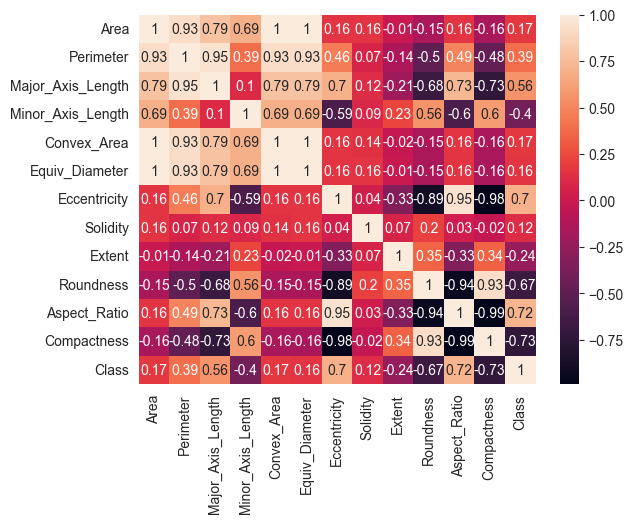

In [17]:
corr = temp_df.corr().round(2)
sns.heatmap(corr,cmap="rocket",annot=True)

The brighter the color is, the stronger the relationship between 2 variables.<br>
Notably, 3 features have perfect positive correlation with each other: `Area`, `Convex_Area` and `Equiv_Diameter`. Other closely correlated features are `Aspect_Ratio` and `Eccentricity` with $0.95$ correlation, then `Perimeter` with `Area`, `Convex_Area` and `Equiv_Diameter` with $0.93$ correlation. Meanwhile, `Compactness` and `Aspect_Ratio` are highly inversely correlated at $-0.99$ correlation, implying `Compactness` decreases with increasing `Aspect_Ratio`.

Let’s plot some interesting pattern.

### The number of data in each class

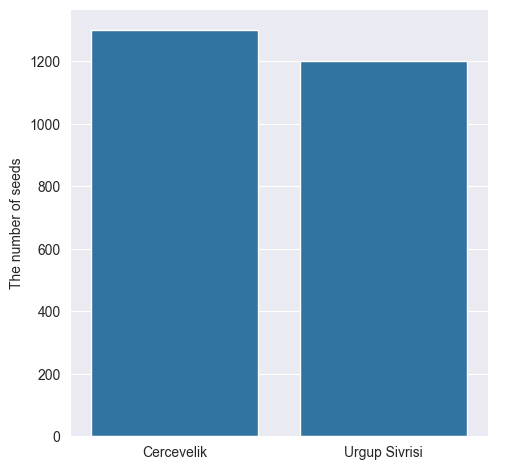

In [18]:
g = sns.catplot(data=temp_df,x='Class',kind='count')
g.set_axis_labels("", "Number of seeds")
g.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])

We can see that in the dataset, the number of instances classified as Çerçevelik seeds is slightly more than that of Ürgüp Sivrisi.

### Boxplot

We display the relationship between Class and the first four features which have strongest relationship with it.

C:\Users\Lloyd\AppData\Local\Temp\ipykernel_11028\3818130570.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])
C:\Users\Lloyd\AppData\Local\Temp\ipykernel_11028\3818130570.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])
C:\Users\Lloyd\AppData\Local\Temp\ipykernel_11028\3818130570.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])
C:\Users\Lloyd\AppData\Local\Temp\ipykernel_11028\3818130570.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])


[Text(0, 0, 'Cercevelik'), Text(1, 0, 'Urgup Sivrisi')]

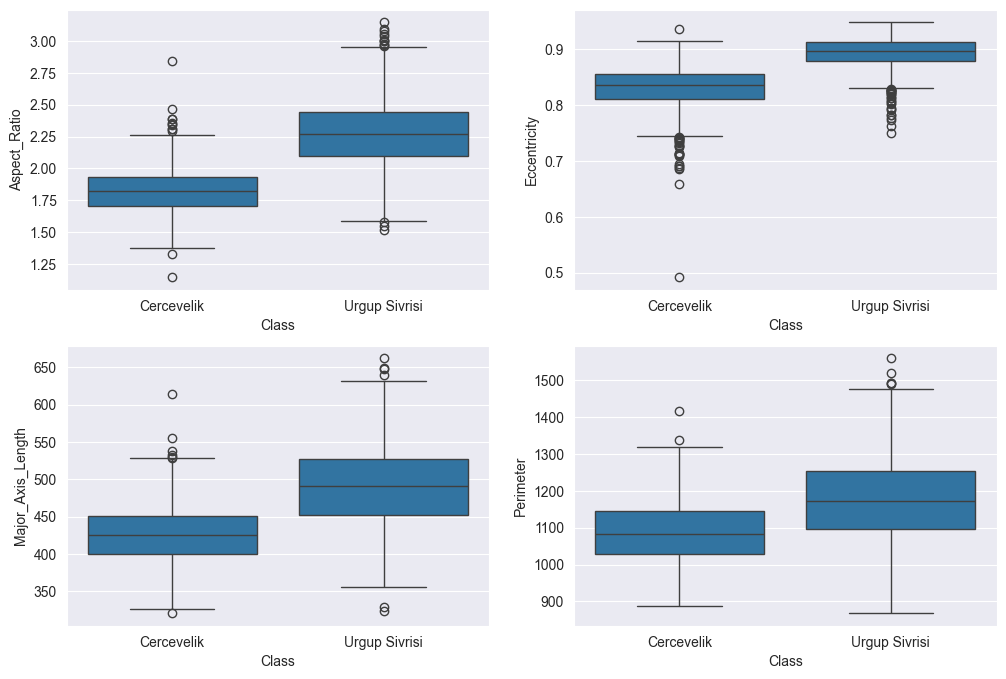

In [19]:
# Boxplot
f = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
# Aspect_Ration vs Class
a=sns.boxplot(data=temp_df,x='Class',y='Aspect_Ratio')
a.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])

plt.subplot(2,2,2)
# Eccentricity vs Class
b=sns.boxplot(data=temp_df,x='Class',y='Eccentricity')
b.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])

plt.subplot(2,2,3)
# Major_Axis_Length vs Class
c=sns.boxplot(data=temp_df,x='Class',y='Major_Axis_Length')
c.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])

plt.subplot(2,2,4)
# Perimeter vs Class
d=sns.boxplot(data=temp_df,x='Class',y='Perimeter')
d.set_xticklabels(["Cercevelik", "Urgup Sivrisi"])

Ürgüp Sivrisi has a higher median in all 4 features. Since these features are related to shape and size, this may imply that Ürgüp Sivrisi seeds are generally bigger and more elongated than Çerçevelik seeds.

### Scatterplot

As we can see from the correlation plot, some other combinations of the variables also show strong relationships (around 0.95). Let’s have a look at the four of them.

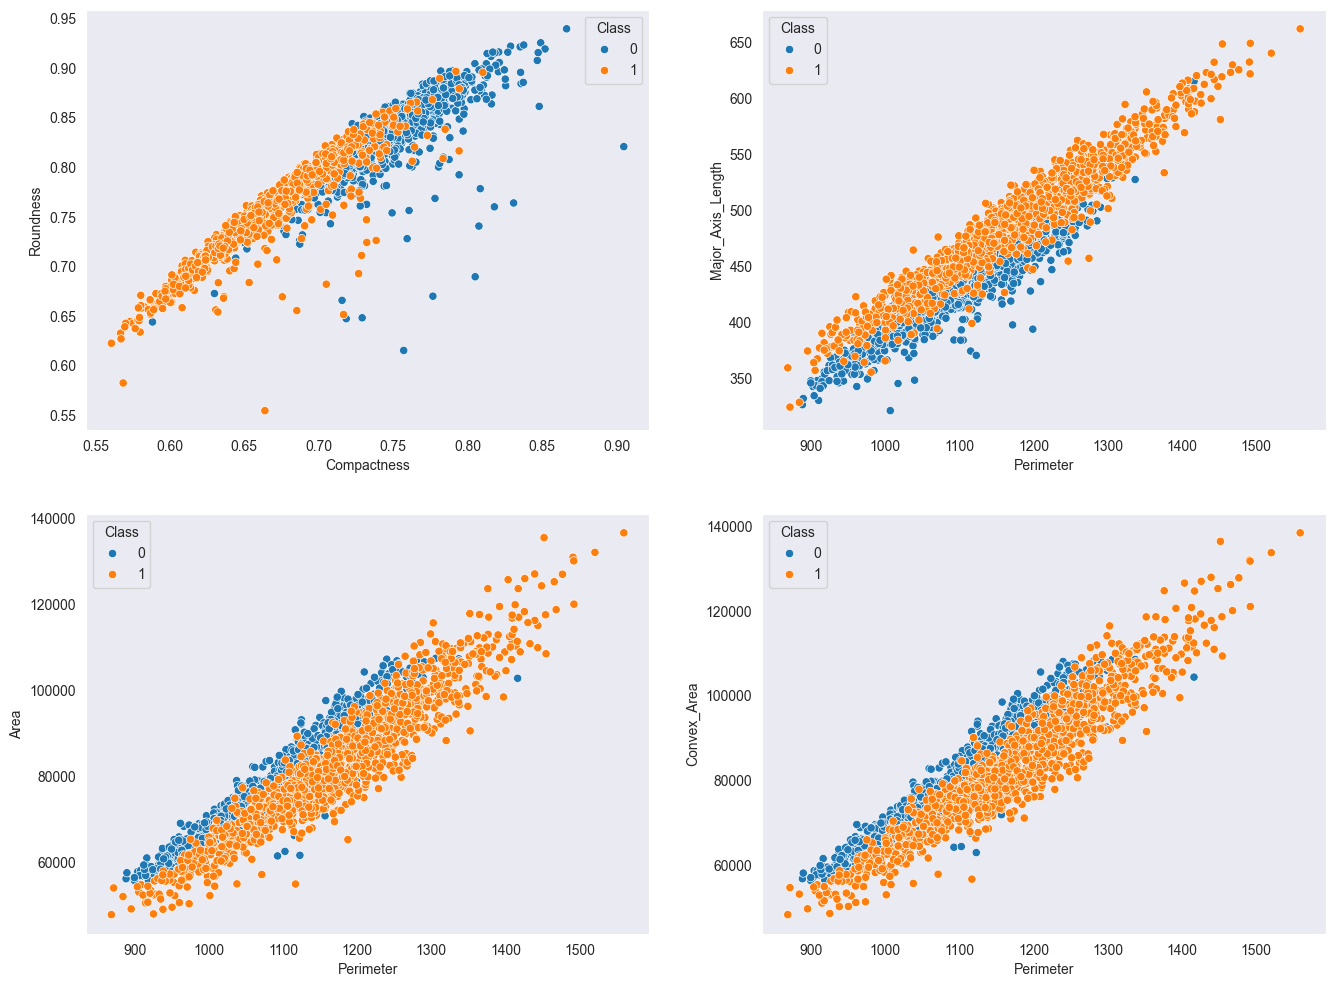

In [20]:
#The relationships among other features
f = plt.figure(figsize=(16,12))
#Roundness vs. Compactness
plt.subplot(2,2,1)
sns.scatterplot(data=temp_df,x='Compactness', y='Roundness',hue='Class')
plt.grid()

#Perimeter vs. Major_Axis_Length
plt.subplot(2,2,2)
sns.scatterplot(data=temp_df,x='Perimeter', y='Major_Axis_Length',hue='Class')
plt.grid()

#Perimeter vs. Area
plt.subplot(2,2,3)
sns.scatterplot(data=temp_df,x='Perimeter', y='Area',hue='Class')
plt.grid()

#Perimeter vs. Convex_Area
plt.subplot(2,2,4)
sns.scatterplot(data=temp_df,x='Perimeter', y='Convex_Area',hue='Class')
plt.grid()

The scatterplot is divided according to their class. As you can see two features got very strong relationships. While they don’t have strong relationships with **Class**, which can be seen from the distribution of orange and blue points, representing two different seed classes. The distribution of two classes doesn’t appear like cluster.

## **6** | **Initial Model Training**

### *Model 1: K-Nearest Neighbors*

First, we import the needed libraries for KNN model training and evaluation metrics.

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

We'll split the data to training set (70%) and testing set (30%).

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=1)
print("X train: \n" + str(X_train))
print("y train: \n" + str(y_train))
print("X test: \n" + str(X_test))
print("y test: \n" + str(y_test))

X train: 
[[0.26154454 0.28994522 0.32398179 ... 0.59142857 0.44956657 0.39755885]
 [0.11275456 0.05150767 0.03912695 ... 0.87298701 0.17572781 0.73205464]
 [0.28294692 0.27203259 0.23053555 ... 0.69480519 0.28145513 0.58849172]
 ...
 [0.25996503 0.22470169 0.25160152 ... 0.77012987 0.33947988 0.51874455]
 [0.33038867 0.27929924 0.29133099 ... 0.79662338 0.32304455 0.53879686]
 [0.29046088 0.33104137 0.34768947 ... 0.55714286 0.44881495 0.39581517]]
y train: 
[0 0 0 ... 0 0 0]
X test: 
[[0.5803238  0.52078181 0.51605595 ... 0.70935065 0.39955905 0.45074106]
 [0.46750155 0.42055965 0.39749468 ... 0.73090909 0.3382773  0.51816332]
 [0.49841485 0.48096792 0.46795451 ... 0.64467532 0.40411886 0.44173205]
 ...
 [0.26437638 0.30036543 0.29173619 ... 0.57142857 0.39635216 0.45451904]
 [0.35894398 0.38222341 0.4074294  ... 0.58883117 0.4620935  0.38419064]
 [0.28870085 0.36542806 0.43875084 ... 0.46935065 0.59958912 0.26009881]]
y test: 
[1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0

Possible values for the hyperparameter `k` will be numbers 1-20.  
For each `k`, we will store the average cross-validation accuracy in `accuracy_scores`. We will use these scores to determine the best `k` later on.

In [23]:
k_choices = range(1, 21)
accuracy_scores = []
for k in k_choices:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=10).mean()
    accuracy_scores.append(score)

Let's visualize the data.

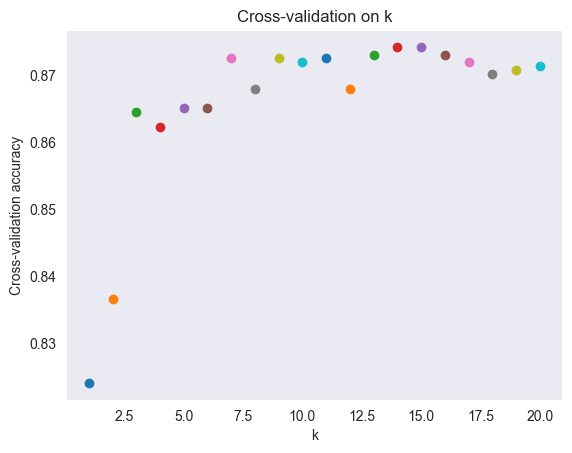

In [24]:
for i in range(len(accuracy_scores)):
    plt.scatter(k_choices[i], accuracy_scores[i])
plt.xlabel("k")
plt.ylabel("Cross-validation accuracy")
plt.title("Cross-validation on k")
plt.grid()
plt.show()

The best `k` seems to be between 12.5 and 15.0, with a cross-validation accuracy higher than 0.87. Now let's compute this based on the accuracy scores.

In [25]:
best_k = k_choices[np.argmax(accuracy_scores)]
print("Best k:", best_k)
print("Accuracy:", max(accuracy_scores))

Best k: 14
Accuracy: 0.8742857142857143


Let's train the model using the best `k` (14).

In [26]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

Let's test the model on the testing data.

In [27]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,

Let's evaluate the model. First, let's print out the confusion matrix.

In [28]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[346  33]
 [ 65 306]]


Note that Çerçevelik is encoded as `0` and Ürgüp Sivrisi as `1`.  
<b>True positives:</b> 342 instances were labeled correctly as Ürgüp Sivrisi.<br>
<b>True negatives:</b> 309 instances were labeled correctly as Çerçevelik.<br>
<b>False negatives:</b> 37 instances were labeled incorrectly as Çerçevelik.<br>
<b>False positives:</b> 62 instances were labeled incorrectly as Ürgüp Sivrisi.<br>

Let's get the evaluation metrics per class using `classification_report()`, and then the overall test accuracy.

In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Test Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

   Cercevelik       0.84      0.91      0.88       379
Urgup Sivrisi       0.90      0.82      0.86       371

     accuracy                           0.87       750
    macro avg       0.87      0.87      0.87       750
 weighted avg       0.87      0.87      0.87       750

Test Accuracy: 0.8693333333333333


### *Model 2: Decision Tree*

Importing the libraries needed for decision tree classifier -> **TO MOVE TO SECTION 3**

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

As we have a classification problem in our hands, we will be using the `DecisionTreeClassifier` library from `sklearn` for training our decision tree model on the pumpkin seeds dataset.

<span style="color:red">why decision tree?</span>

In the following cell, we will be splitting our train (70%) and test (30%) data. It is enough to use the original, non-normalized data for decision trees as normalization does not affect the performance of the model.

*On data normalization:* <br> https://forecastegy.com/posts/do-decision-trees-need-feature-scaling-or-normalization/ <br>
https://sebastianraschka.com/faq/docs/when-to-standardize.html

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print("X train: \n" + str(X_train))
print("y train: \n" + str(y_train))
print("X test: \n" + str(X_test))
print("y test: \n" + str(y_test))

X train: 
[[7.112100e+04 1.068827e+03 4.313440e+02 ... 7.823000e-01 2.045900e+00
  6.976000e-01]
 [5.793300e+04 9.040750e+02 3.341895e+02 ... 8.907000e-01 1.499400e+00
  8.127000e-01]
 [7.301800e+04 1.056450e+03 3.994726e+02 ... 8.221000e-01 1.710400e+00
  7.633000e-01]
 ...
 [7.098100e+04 1.023746e+03 4.066575e+02 ... 8.511000e-01 1.826200e+00
  7.393000e-01]
 [7.722300e+04 1.061471e+03 4.202079e+02 ... 8.613000e-01 1.793400e+00
  7.462000e-01]
 [7.368400e+04 1.097223e+03 4.394299e+02 ... 7.691000e-01 2.044400e+00
  6.970000e-01]]
y train: 
[0 0 0 ... 0 0 0]
X test: 
[[9.937600e+04 1.228327e+03 4.968541e+02 ... 8.277000e-01 1.946100e+00
  7.159000e-01]
 [8.937600e+04 1.159077e+03 4.564168e+02 ... 8.360000e-01 1.823800e+00
  7.391000e-01]
 [9.211600e+04 1.200817e+03 4.804483e+02 ... 8.028000e-01 1.955200e+00
  7.128000e-01]
 ...
 [7.137200e+04 1.076027e+03 4.203461e+02 ... 7.746000e-01 1.939700e+00
  7.172000e-01]
 [7.975400e+04 1.132588e+03 4.598052e+02 ... 7.813000e-01 2.070900e+00
 

In [32]:
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (1750, 12)
y_train shape :  (1750,)
X_test shape :  (750, 12)
y_test shape :  (750,)


After splitting, we end up with training data that has 1750 instances and test data with 750 instances.

For this part of the decision tree modeling, we will be using the default parameters for the `DecisionTreeClassifier` to see its baseline performance. In the following cell, we will be defining our decision tree as `pumpkin_dt`.

In [33]:
pumpkin_dt = DecisionTreeClassifier()

We will be fitting the decision tree model on the training data and creating predictions on the test data in the following cells.

In [34]:
# Fit the model
pumpkin_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
# Test predictions
pumpkin_dt_test_preds = pumpkin_dt.predict(X_test)
pumpkin_dt_test_preds

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,

Now that we have fitted the decision tree model and created predictions on our test data, we can describe and visualize our tree.

The following cell contains the definition of the function for describing the decisiont tree. The tree structure description is taken from this page in scikit-learn: <br> https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

In [36]:
def describe_tree(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    values = clf.tree_.value

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node, values: {values}.".format(
                    space=node_depth[i] * "\t", node=i, values=values[i]
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

In [37]:
describe_tree(pumpkin_dt)

The binary tree structure has 369 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 6] <= 0.8713499903678894 else to node 248.
	node=1 is a split node: go to node 2 if X[:, 10] <= 1.905049979686737 else to node 139.
		node=2 is a split node: go to node 3 if X[:, 5] <= 370.1173553466797 else to node 138.
			node=3 is a split node: go to node 4 if X[:, 11] <= 0.7415499985218048 else to node 77.
				node=4 is a split node: go to node 5 if X[:, 8] <= 0.6166499853134155 else to node 6.
					node=5 is a leaf node, values: [[0. 3.]].
					node=6 is a split node: go to node 7 if X[:, 3] <= 259.89634704589844 else to node 66.
						node=7 is a split node: go to node 8 if X[:, 7] <= 0.9917500019073486 else to node 53.
							node=8 is a split node: go to node 9 if X[:, 3] <= 203.00475311279297 else to node 12.
								node=9 is a split node: go to node 10 if X[:, 1] <= 937.7369995117188 else to node 11.
									node=10 is a leaf node, values: [[3. 0.]].
	

We ended up getting a tree structure for our test data that has 367 nodes in total. At the root node, it looks at the feature at index 6 to ask the first question, and this feature is the `Eccentricity` of the pumpkin seed.

We can also plot our tree as a graph by calling the `plot_tree` function from `sklearn.tree`.

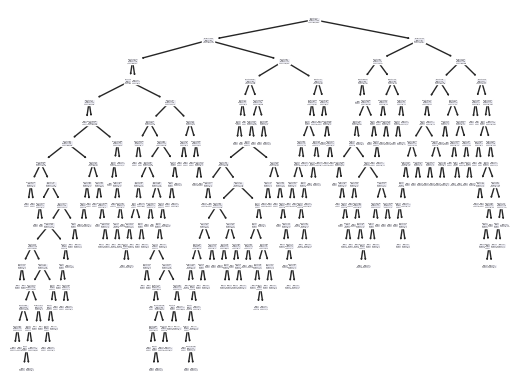

In [38]:
tree.plot_tree(pumpkin_dt)
plt.show()

We can get the confusion matrix, classification report, and the test accuracy for the tree now that we have visualized it.

In [39]:
# Confusion matrix of the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, pumpkin_dt_test_preds))

Confusion Matrix:
[[305  74]
 [ 61 310]]


Note that Çerçevelik is encoded as 0 and Ürgüp Sivrisi as 1. The confusion matrix resulted in the following values:
- **True Positives:** 310 instances were labeled correctly as Urgup Sivrisi.
- **True Negatives:** 311 instances were labeled correctly as Cercevelik.
- **False Negatives:** 61 instances were labeled incorrectly as Cercevelik.
- **False Positives:** 68 instances were labeled incorrectly as Urgup Sivrisi.

From the classification report, we can get the evaluation metrics of the model. We can also get the accuracy of the model by separately calling the `accuracy_score()` function.

In [40]:
print("Classification Report:")
print(classification_report(y_test, pumpkin_dt_test_preds, target_names=label_encoder.classes_))

print("Test Accuracy:", accuracy_score(y_test, pumpkin_dt_test_preds))

Classification Report:
               precision    recall  f1-score   support

   Cercevelik       0.83      0.80      0.82       379
Urgup Sivrisi       0.81      0.84      0.82       371

     accuracy                           0.82       750
    macro avg       0.82      0.82      0.82       750
 weighted avg       0.82      0.82      0.82       750

Test Accuracy: 0.82


The baseline default model resulted in a test accuracy of `0.828` for this dataset. We can improve this through hyperparameter tuning.

<span style="color:red">*What values to consider for each hyperparameter to tune? What basis*</span>

Some regularization techniques for decision trees are deciding on the stopping criterion. We can modify the parameters of the `DecisionTreeClassifier()` model so that our model stops asking questions once it reaches certain thresholds. For this model, we can tune the following parameters: `criterion`, `min_samples_split`, `max_depth`, and `max_leaf_nodes`.

In [41]:
# Hyperparameters to tune: criterion, min_samples_split, max_depth, max_leaf_nodes
# Values considered for hyperparams can still be changed based on related works found
hyperparameters = [
    {
        "criterion" : ["gini", "entropy"],
        "min_samples_split" : [10,20,50,100,500,1000,2000],
        "max_depth" : [10,20,50,100,500],
        "max_leaf_nodes" : [10,20,50,100,500,1000,1500]
    }
]

Through the `RandomizedSearchCV()`, we can find the best hyperparameters using cross-validation. Since we've defined our hyperparameter options in the previous cell, we can just input this as our parameter for `param_distributions` using 5-fold cross-validation. <br>
*Optionally: explain why RandomizedSearchCV over other search algorithms for determining the best hyperparameters* <br>
*Some sources: https://insidelearningmachines.com/tune_hyperparameters_in_decision_trees/*

In [42]:
# n_iter: number of parameter settings to be sampled
# cv: number of cross validation folds
rsc_pumpkin = RandomizedSearchCV(estimator=pumpkin_dt,param_distributions=hyperparameters,n_iter=100,cv=5)

We can now fit our data to this `RandomizedSearchCV` model, and it finds the best parameters for us.

In [43]:
rsc_pumpkin.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': [10, 20, 50, 100, 500],
                                         'max_leaf_nodes': [10, 20, 50, 100,
                                                            500, 1000, 1500],
                                         'min_samples_split': [10, 20, 50, 100,
                                                               500, 1000,
                                                               2000]}])

By calling the `best_params_` variable, we can get the dictionary of best hyperparameter values for our tuned decision tree model.

In [44]:
rsc_pumpkin.best_params_

{'min_samples_split': 100,
 'max_leaf_nodes': 10,
 'max_depth': 50,
 'criterion': 'gini'}

Now that we have the best hyperparameters based from `RandomizedSearchCV`, we can define a new estimator model based on these hyperparameters. We follow the same pipeline as the baseline model, in which we fit the model using our train data and create predictions on our test data.

In [45]:
pumpkin_dt_tuned = DecisionTreeClassifier(min_samples_split=100, max_leaf_nodes=10, max_depth=20,criterion="gini")

In [46]:
pumpkin_dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=10, min_samples_split=100)

In [47]:
pumpkin_dt_tuned_preds = pumpkin_dt_tuned.predict(X_test)
pumpkin_dt_tuned_preds

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,

Now that we have fitted the tuned decision tree model and created predictions on our test data, we can describe and visualize this tuned tree.

In [48]:
describe_tree(pumpkin_dt_tuned)

The binary tree structure has 19 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 10] <= 2.0382500886917114 else to node 2.
	node=1 is a split node: go to node 3 if X[:, 10] <= 1.905049979686737 else to node 4.
	node=2 is a split node: go to node 5 if X[:, 10] <= 2.1327000856399536 else to node 6.
		node=3 is a split node: go to node 9 if X[:, 5] <= 370.1173553466797 else to node 10.
		node=4 is a split node: go to node 7 if X[:, 7] <= 0.991349995136261 else to node 8.
		node=5 is a split node: go to node 13 if X[:, 7] <= 0.9905499815940857 else to node 14.
		node=6 is a leaf node, values: [[ 30. 590.]].
			node=7 is a split node: go to node 11 if X[:, 1] <= 978.4070129394531 else to node 12.
			node=8 is a leaf node, values: [[19. 39.]].
			node=9 is a split node: go to node 17 if X[:, 11] <= 0.7415499985218048 else to node 18.
			node=10 is a leaf node, values: [[0. 6.]].
				node=11 is a leaf node, values: [[2. 9.]].
				node=12 is a split no

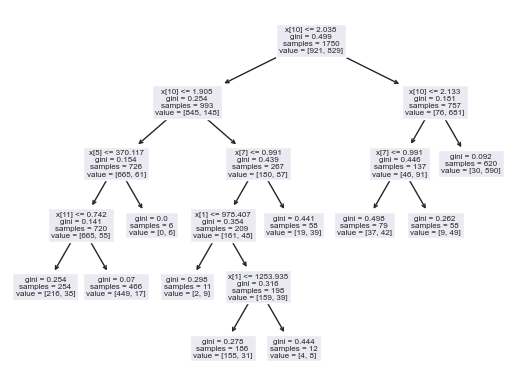

In [49]:
tree.plot_tree(pumpkin_dt_tuned)
plt.show()

We significantly ended up with lesser nodes and a more shallow depth of tree. Our tuned tree now has 19 nodes, and at the root node, it looks at the feature at index 6 to ask the first question. This is the same as our original tree, and it asks about the `Eccentricity` of the pumpkin seed.

In [50]:
# Confusion matrix of the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, pumpkin_dt_tuned_preds))

Confusion Matrix:
[[321  58]
 [ 41 330]]


Note that Çerçevelik is encoded as 0 and Ürgüp Sivrisi as 1. The confusion matrix of the tuned tree resulted in the following values:
- **True Positives:** 330 instances were labeled correctly as Urgup Sivrisi.
- **True Negatives:** 321 instances were labeled correctly as Cercevelik.
- **False Negatives:** 41 instances were labeled incorrectly as Cercevelik.
- **False Positives:** 58 instances were labeled incorrectly as Urgup Sivrisi.

From the classification report, we can get the evaluation metrics of the tuned model. We can also get its accuracy by separately calling the `accuracy_score()` function.

In [51]:
print("Classification Report:")
print(classification_report(y_test, pumpkin_dt_tuned_preds, target_names=label_encoder.classes_))

print("Test Accuracy:", accuracy_score(y_test, pumpkin_dt_tuned_preds))

Classification Report:
               precision    recall  f1-score   support

   Cercevelik       0.89      0.85      0.87       379
Urgup Sivrisi       0.85      0.89      0.87       371

     accuracy                           0.87       750
    macro avg       0.87      0.87      0.87       750
 weighted avg       0.87      0.87      0.87       750

Test Accuracy: 0.868


The tuned model resulted in a test accuracy of `0.868` for this dataset.

### *Model 3: Logistic Regression*

## **7** | **Error Analysis**

## **8** | **Improving Model Performance**

## **9** | **Model Performance Summary**

## **10** | **Insights and Conclusions**

## **11** | **References**